In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_excel('/content/database GMAM.xlsx')

In [ ]:
df.head()

,Date,PrixArgent,Prix Or,Prix Pétrole brut,Prix Gaz naturel,Prix Blé,Réserve extérieur,Taux de chomage,Production Industrielle,Indice des prix à la consommation,Downjones,NASDAQ,S&P 500,EUR/USD,Solde Commercial,Prix café,Ratio consommation/revenu
0,2005-11-15,786.38,476.67,54.98,10.30,161.12,68773.0,5.0,100.9014,198.1,10805.87,2232.82,1249.479980,1.179441,-4.7,81.765,1890.411
1,2005-12-15,868.74,510.1,56.47,13.05,164.44,65127.0,4.9,101.4873,198.1,10717.50,2205.32,1248.290039,1.186395,-4.6,81.020,1913.134
2,2006-01-15,918.48,549.86,62.36,8.69,167.16,65594.0,4.7,101.6088,199.3,10864.86,2305.82,1280.079956,1.211845,-5.2,95.405,2054.493
3,2006-02-15,952.13,555,59.71,7.53,179.84,65364.0,4.8,101.6839,199.4,10993.41,2281.39,1280.660034,1.194210,-4.2,91.990,2081.847
4,2006-03-15,1 037.52,557.09,60.93,6.88,174.44,65354.0,4.7,101.8522,199.7,11109.32,2339.79,1294.869995,1.203257,-3.9,87.560,2094.911


In [ ]:
 df['Solde Commercial'] = df['Export '] - df['Import ']

    # Supprimer les colonnes 'Export' et 'Import '
 df.drop(['Export ', 'Import '], axis=1, inplace=True)



In [ ]:
 df['Prix café'] = (df['Prix Café Robusta'] + df['Prix Café Arabica '])/2

    # Supprimer les colonnes 'Export' et 'Import '
 df.drop(['Prix Café Robusta', 'Prix Café Arabica '], axis=1, inplace=True)



In [ ]:
 df['Ratio consommation/revenu'] = df[' revenu personnel'] - df[ 'Dépenses de consommation personnelle']

    # Supprimer les colonnes 'Export' et 'Import '
 df.drop([' revenu personnel',  'Dépenses de consommation personnelle'], axis=1, inplace=True)



In [ ]:
df.columns

Index(['Date', 'PrixArgent', 'Prix Or', 'Prix Pétrole brut',
       'Prix Gaz naturel ', 'Prix Blé ', 'Réserve extérieur',
       'Taux de chomage', 'Production Industrielle',
       'Indice des prix à la consommation', 'Downjones', 'NASDAQ', 'S&P 500',
       'EUR/USD', 'Solde Commercial', 'Prix café',
       'Ratio consommation/revenu'],
      dtype='object')

In [ ]:
df.shape

(122, 17)

In [ ]:
df.dtypes

Date                                    datetime64[ns]
PrixArgent                                      object
Prix Or                                         object
Prix Pétrole brut                              float64
Prix Gaz naturel                               float64
Prix Blé                                       float64
Prix Café Robusta                              float64
Prix Café Arabica                              float64
Réserve extérieur                              float64
Taux de chomage                                float64
Production Industrielle                        float64
Export                                         float64
Import                                         float64
Indice des prix à la consommation              float64
 revenu personnel                              float64
Dépenses de consommation personnelle           float64
Downjones                                      float64
NASDAQ                                         float64
S&P 500   

In [ ]:
def remove_special_characters(df, column_name):
    df[column_name] = df[column_name].map(lambda x: x.replace('\xa0', '') if pd.notnull(x) else x)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

In [ ]:
df=remove_special_characters(df,'PrixArgent')

In [ ]:
df['PrixArgent'].astype('float')

0       786.38
1       868.74
2       918.48
3       952.13
4      1037.52
        ...   
117    1494.10
118    1475.00
119    1581.30
120    1445.20
121        NaN
Name: PrixArgent, Length: 122, dtype: float64

In [ ]:
def remove_special_characters(df, column_name):
    df[column_name] = df[column_name].map(lambda x: str(x).replace('\xa0', '') if pd.notnull(x) else x)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df


In [ ]:
df=remove_special_characters(df,'Prix Or')

In [ ]:
df['Prix Or'].astype('float')

In [ ]:
df.dtypes

Date                                 datetime64[ns]
PrixArgent                                  float64
Prix Or                                     float64
Prix Pétrole brut                           float64
Prix Gaz naturel                            float64
Prix Blé                                    float64
Réserve extérieur                           float64
Taux de chomage                             float64
Production Industrielle                     float64
Indice des prix à la consommation           float64
Downjones                                   float64
NASDAQ                                      float64
S&P 500                                     float64
EUR/USD                                     float64
Solde Commercial                            float64
Prix café                                   float64
Ratio consommation/revenu                   float64
dtype: object

In [ ]:
df.isnull().sum()

Date                                 1
PrixArgent                           1
Prix Or                              1
Prix Pétrole brut                    1
Prix Gaz naturel                     1
Prix Blé                             1
Réserve extérieur                    1
Taux de chomage                      1
Production Industrielle              1
Indice des prix à la consommation    1
Downjones                            1
NASDAQ                               1
S&P 500                              1
EUR/USD                              0
Solde Commercial                     1
Prix café                            1
Ratio consommation/revenu            1
dtype: int64

In [ ]:
def replace_nan_with_mean_except_last(df):
    for column_name in df.columns[:-1]:  # Itérer sur toutes les colonnes sauf la dernière
        mean_value = df[column_name].mean(skipna=True)
        df[column_name].fillna(mean_value, inplace=True)

    return df


In [ ]:
df = replace_nan_with_mean_except_last(df)

In [ ]:
df.isnull().sum()

Date                                 0
PrixArgent                           0
Prix Or                              0
Prix Pétrole brut                    0
Prix Gaz naturel                     0
Prix Blé                             0
Réserve extérieur                    0
Taux de chomage                      0
Production Industrielle              0
Indice des prix à la consommation    0
Downjones                            0
NASDAQ                               0
S&P 500                              0
EUR/USD                              0
Solde Commercial                     0
Prix café                            0
Ratio consommation/revenu            1
dtype: int64

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

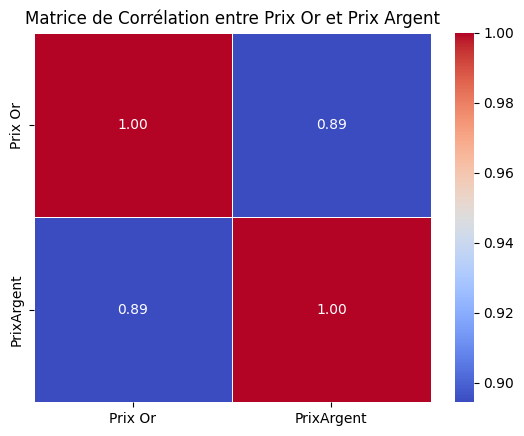

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df et contient les colonnes 'Prix Or' et 'Prix Argent'
# df['Prix Or'] = ...
# df['Prix Argent'] = ...

# Créer une sous-section du DataFrame avec les colonnes pertinentes
df_subset = df[['Prix Or', 'PrixArgent']]

# Créer la matrice de corrélation
correlation_matrix = df_subset.corr()

# Visualiser la matrice de corrélation avec Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Afficher le graphique
plt.title('Matrice de Corrélation entre Prix Or et Prix Argent')
plt.show()


<ipython-input-55-58eefabd9592>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


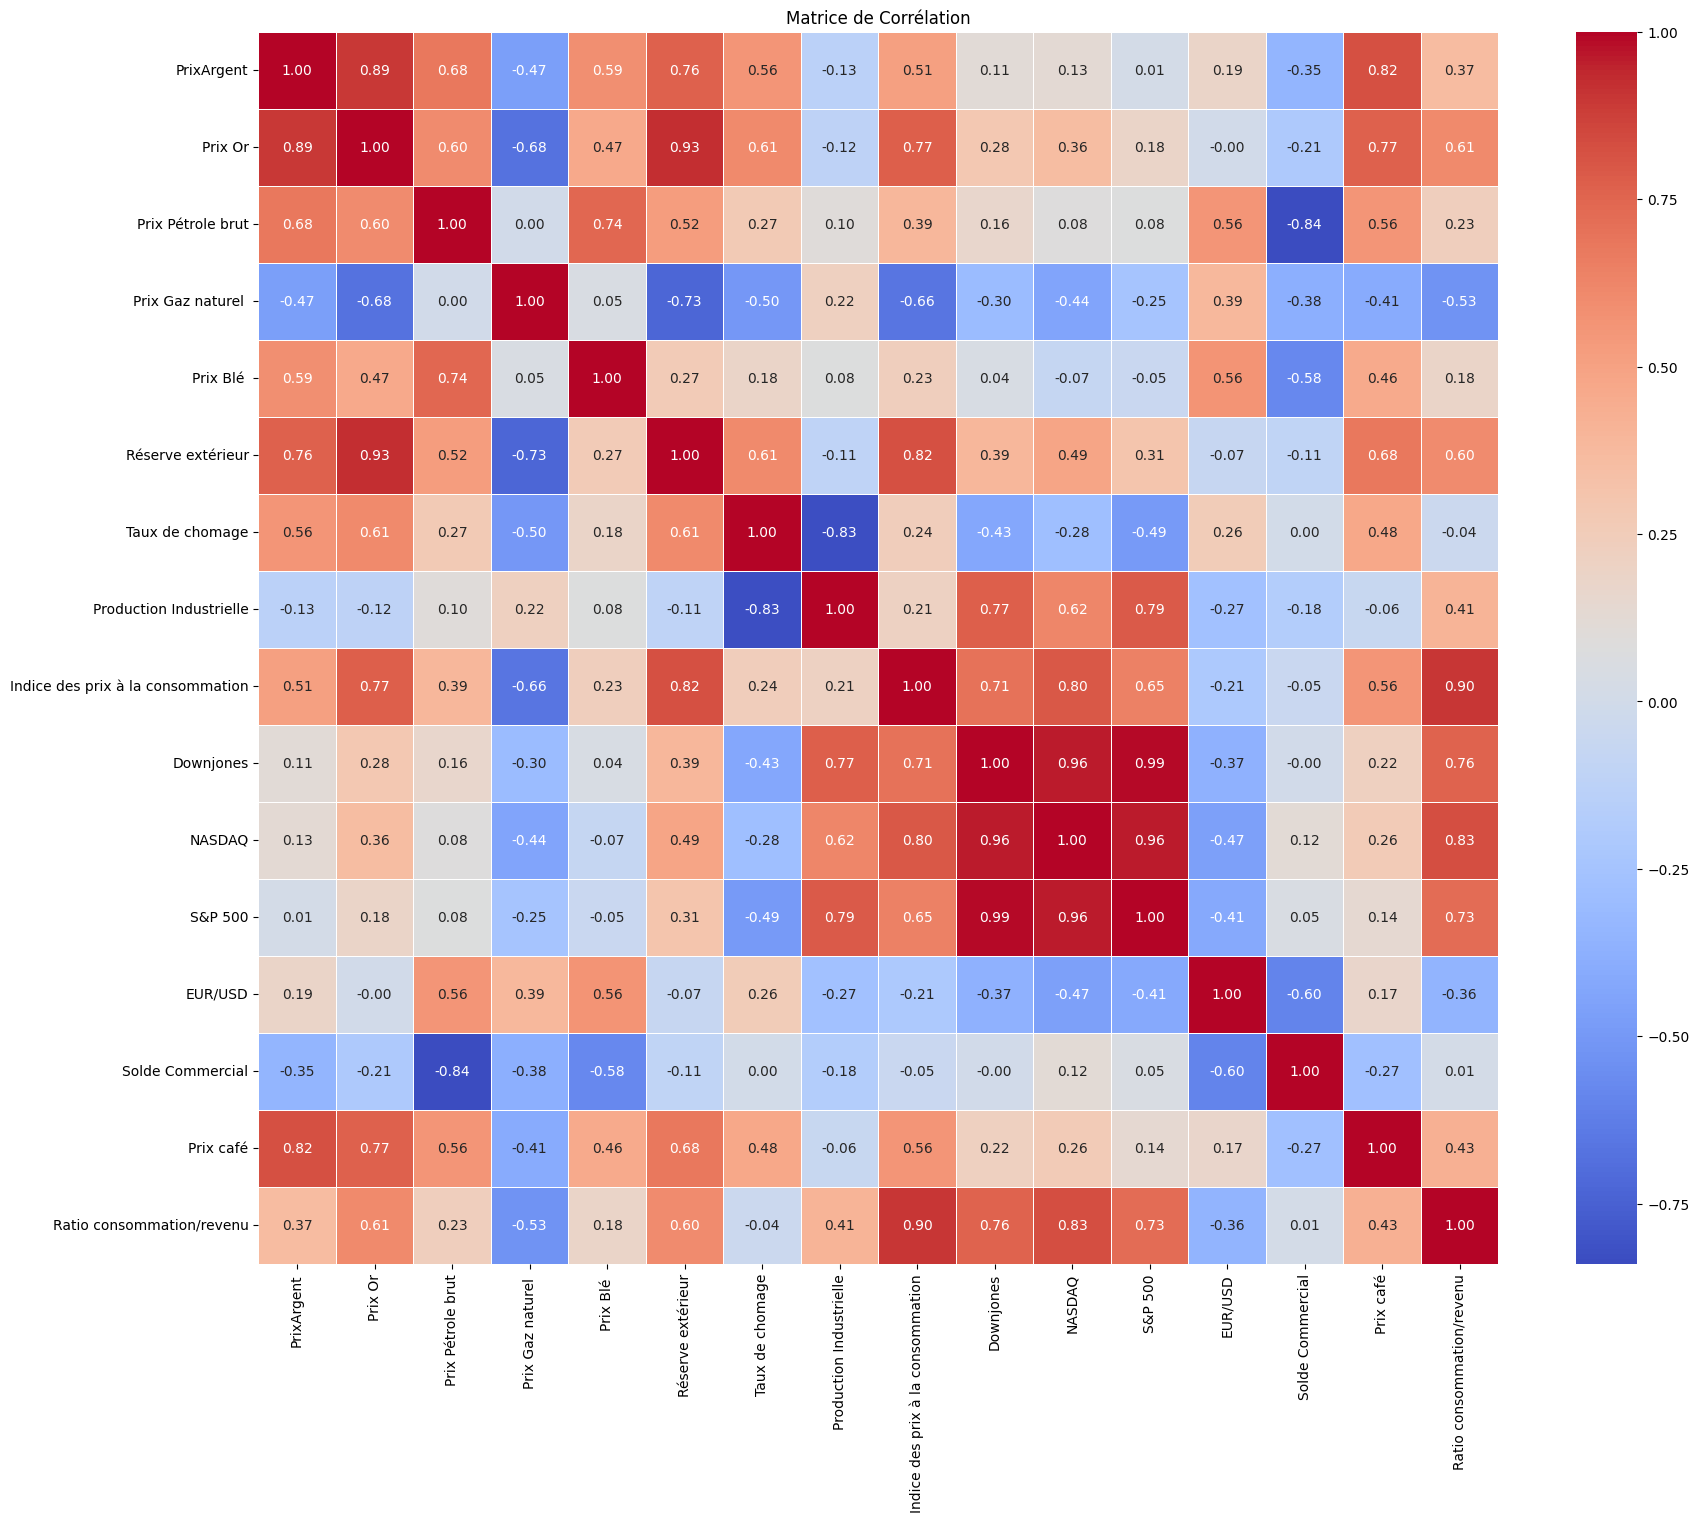

In [ ]:
#X=df.drop('Prix Or',axis=1).values

In [ ]:
# Supprimer une colonne fortement corrélée (par exemple, 'Variable2')
from sklearn.decomposition import PCA

# Supposons que votre DataFrame s'appelle df et contient les colonnes à réduire
X = df[['Prix Or', 'Variable2', 'Variable3']]  # Sélectionnez les colonnes pertinentes
pca = PCA(n_components=2)  # Spécifiez le nombre de composantes principales souhaitées
df_pca = pd.DataFrame(pca.fit_transform(X), columns=['PCA1', 'PCA2'])

df = df.drop([''], axis=1)


In [ ]:
df.columns

Index(['Date', 'Prix Or', 'Prix Pétrole brut', 'Prix Gaz naturel ',
       'Prix Blé ', 'Réserve extérieur', 'Taux de chomage',
       'Production Industrielle', 'EUR/USD', 'Solde Commercial', 'Prix café',
       'IndBoursier', 'IndConsommation'],
      dtype='object')

In [ ]:
df.shape

(122, 13)

In [ ]:

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler


# Supposons que votre DataFrame s'appelle df
# Assurez-vous que la colonne 'Date' est utilisée uniquement pour l'index ou pour des fonctionnalités spécifiques.

# Séparation des fonctionnalités (X) et de la cible (y)
features = df.drop(['Date', 'Prix Or'], axis=1)
target = df['Prix Or']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalisation des données (si nécessaire)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Vous pouvez également inspecter l'importance des fonctionnalités
feature_importances = rf_model.feature_importances_
print('Importance des fonctionnalités:')
for feature, importance in zip(features.columns, feature_importances):
    print(f'{feature}: {importance}')



Mean Squared Error: 2395.5863352851047
Importance des fonctionnalités:
Prix Pétrole brut: 0.01133142719237299
Prix Gaz naturel : 0.001316609720894217
Prix Blé : 0.018031064010899798
Réserve extérieur: 0.9302756164733347
Taux de chomage: 0.007728217146151925
Production Industrielle: 0.002632777596559773
EUR/USD: 0.005333424679939322
Solde Commercial: 0.0025644098100867816
Prix café: 0.005963408228502906
IndBoursier: 0.005098769762620213
IndConsommation: 0.009724275378637291


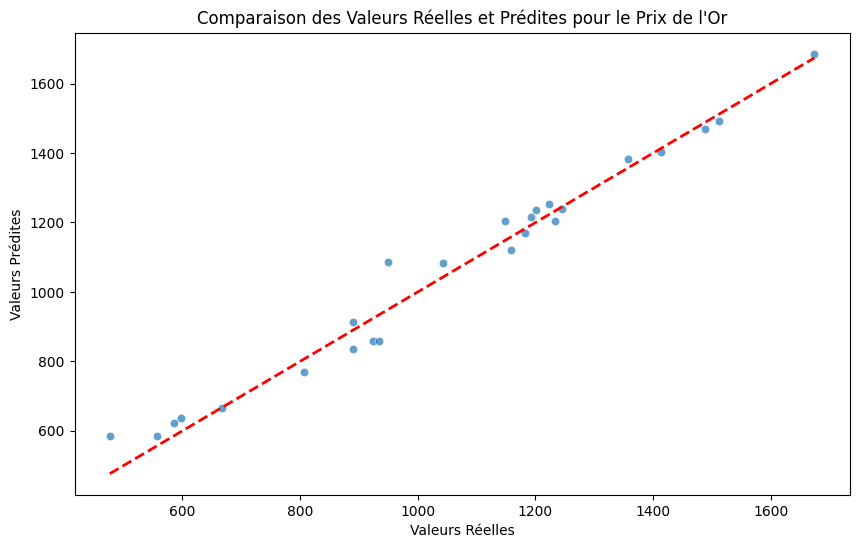

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer un DataFrame avec les valeurs réelles et prédites
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Tracer le graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.7)

# Tracer une ligne diagonale pour comparer les valeurs réelles et prédites
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Comparaison des Valeurs Réelles et Prédites pour le Prix de l\'Or')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

2395.5863352851047


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

48.94472734917526


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.9759663109874193


In [ ]:
feature_importances = rf_model.feature_importances_
print(feature_importances)

[0.01133143 0.00131661 0.01803106 0.93027562 0.00772822 0.00263278
 0.00533342 0.00256441 0.00596341 0.00509877 0.00972428]


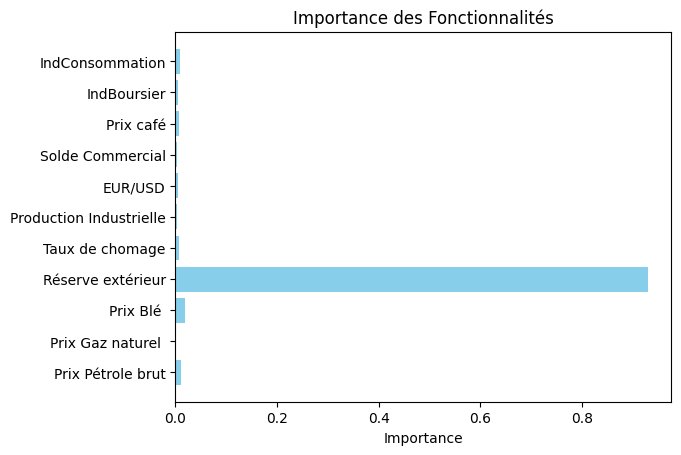

In [ ]:
import matplotlib.pyplot as plt

# Supposons que feature_importances contient les importances des fonctionnalités
feature_names = features.columns
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Fonctionnalités')
plt.show()


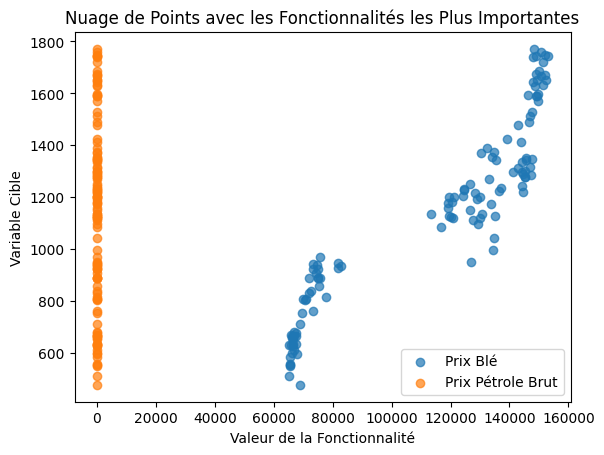

In [ ]:
# Supposons que 'feature1', 'feature2', 'feature3' soient les fonctionnalités les plus importantes
plt.scatter(df['Réserve extérieur'], df['Prix Or'], alpha=0.7, label='Prix Blé')
plt.scatter(df['Prix Pétrole brut'], df['Prix Or'], alpha=0.7, label='Prix Pétrole Brut')
plt.xlabel('Valeur de la Fonctionnalité')
plt.ylabel('Variable Cible')
plt.legend()
plt.title('Nuage de Points avec les Fonctionnalités les Plus Importantes')
plt.show()


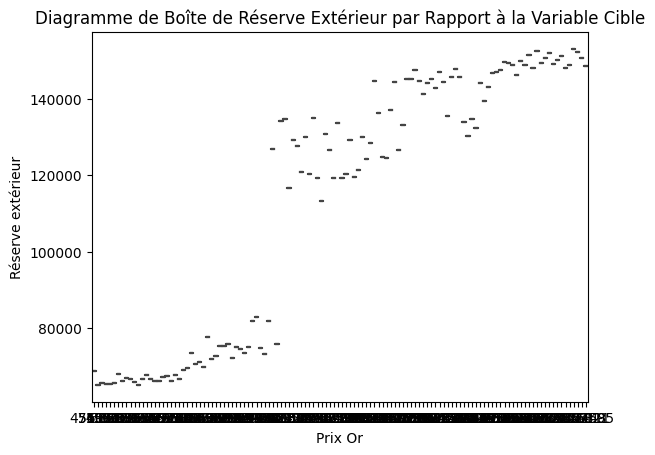

In [ ]:
import seaborn as sns

# Supposons que 'feature1', 'feature2', 'feature3' soient les fonctionnalités les plus importantes
sns.boxplot(x=df['Prix Or'], y=df['Réserve extérieur'])
plt.title('Diagramme de Boîte de Réserve Extérieur par Rapport à la Variable Cible')
plt.show()


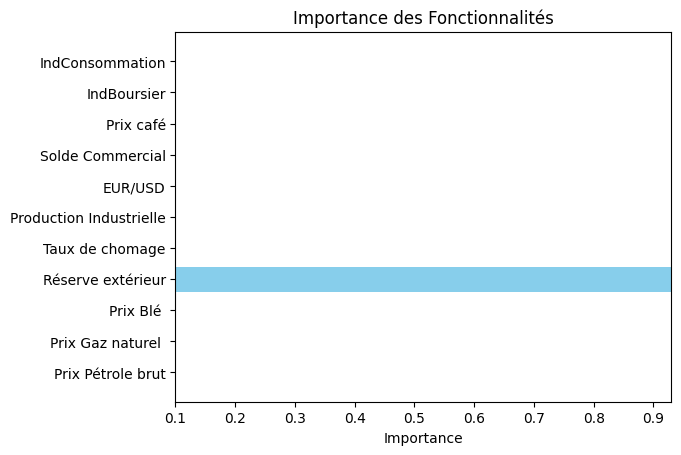

In [ ]:
import matplotlib.pyplot as plt

# Supposons que feature_importances contient les importances des fonctionnalités
feature_names = features.columns
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Fonctionnalités')

# Définir la limite minimale pour l'axe des x
plt.xlim(0.1, max(feature_importances))  # ajustez la valeur minimale selon vos besoins

plt.show()


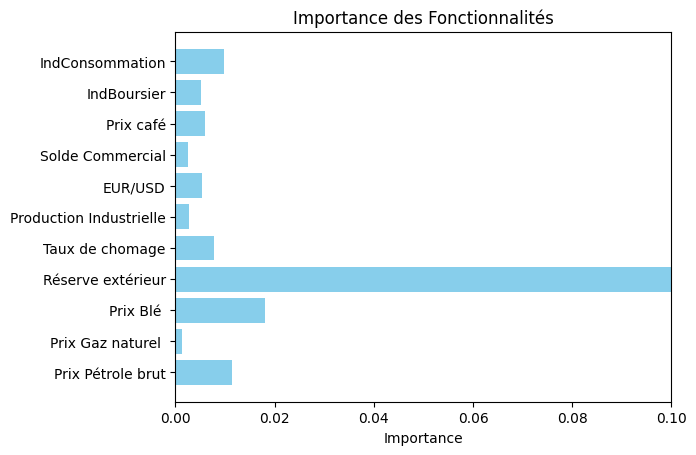

In [ ]:
import matplotlib.pyplot as plt

# Supposons que feature_importances contient les importances des fonctionnalités
feature_names = features.columns
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Importance des Fonctionnalités')

# Définir la limite minimale pour l'axe des x
plt.xlim(0, 0.1)  # ajustez la valeur minimale selon vos besoins

plt.show()


In [ ]:
df.columns


Index(['Date', 'Prix Or', 'Prix Pétrole brut', 'Prix Gaz naturel ',
       'Prix Blé ', 'Réserve extérieur', 'Taux de chomage',
       'Production Industrielle', 'EUR/USD', 'Solde Commercial', 'Prix café',
       'IndBoursier', 'IndConsommation'],
      dtype='object')

In [ ]:
df.shape

(122, 13)